In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

uploaded = files.upload()

Saving Stock_Data.csv to Stock_Data (1).csv


In [4]:
data = pd.read_csv('Stock_Data.csv')
data.head()

,Stock Name,Symbol,Shares,Purchase Price,Cost Basis,Current Price,Market Value,Gain/Loss,Dividend/share,Annual Yield
0,Apple,AAPL,100,$90.00,"$9,000.00",$144.13,"$14,413.27","$14,269.14",$2.28,1.58%
1,Microsoft,MSFT,200,$32.00,"$6,400.00",$65.57,"$13,114.14","$13,048.57",$1.56,2.38%
2,Salesforce,CRM,150,$25.00,"$3,750.00",$82.57,"$12,385.50","$12,302.93",$0.00,0.00%
3,Oracle,ORCL,250,$50.00,"$12,500.00",$44.56,"$11,138.75","$11,094.20",$0.64,1.44%
4,Hewlett Packard Enterprise,HPE,500,$18.00,"$9,000.00",$17.69,"$8,842.50","$8,824.82",$0.26,1.47%


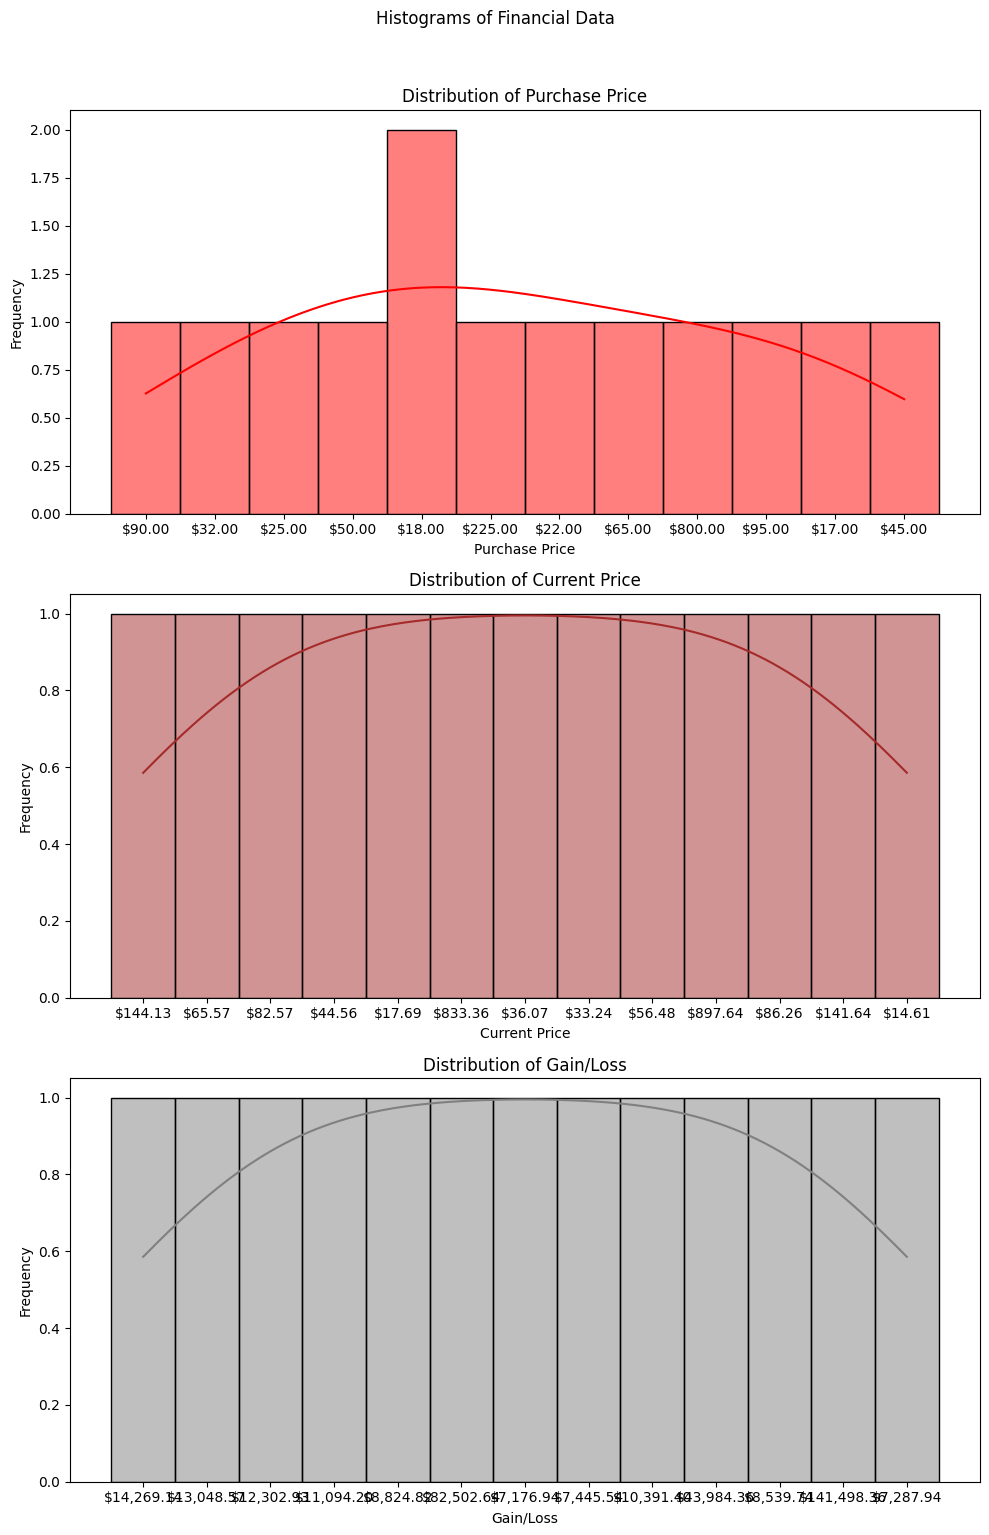

In [18]:
fig, axes = plt.subplots(3, 1, figsize=(10, 15))

sns.histplot(data['Purchase Price'], bins=20, kde=True, ax=axes[0], color='red')
axes[0].set_title('Distribution of Purchase Price')
axes[0].set_xlabel('Purchase Price')
axes[0].set_ylabel('Frequency')

sns.histplot(data['Current Price'], bins=20, kde=True, ax=axes[1], color='brown')
axes[1].set_title('Distribution of Current Price')
axes[1].set_xlabel('Current Price')
axes[1].set_ylabel('Frequency')

sns.histplot(data['Gain/Loss'], bins=20, kde=True, ax=axes[2], color='grey')
axes[2].set_title('Distribution of Gain/Loss')
axes[2].set_xlabel('Gain/Loss')
axes[2].set_ylabel('Frequency')

# Add overall title to the figure
fig.suptitle('Histograms of Financial Data', y=1.02)

plt.tight_layout()
plt.show()

<ipython-input-28-bf2dd1be5611>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Dividend/share', y='Stock Name', data=top_5_dividend, palette='coolwarm')


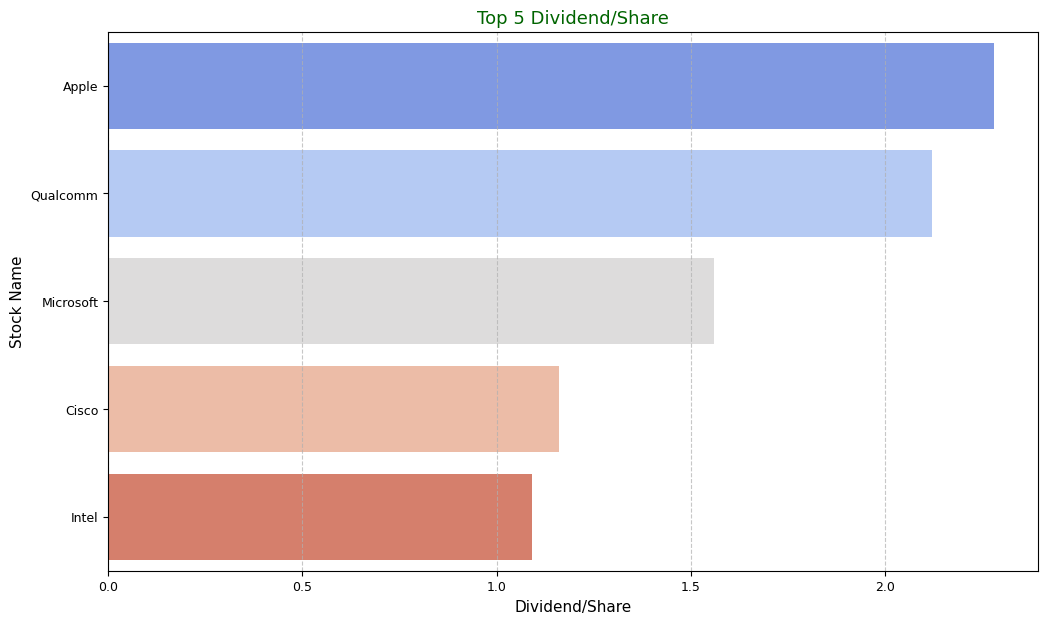

,Stock Name,Symbol,Dividend/share
0,Apple,AAPL,2.28
8,Qualcomm,QCOM,2.12
1,Microsoft,MSFT,1.56
7,Cisco,CSCO,1.16
6,Intel,INTC,1.09


In [28]:
# Mengonversi kolom dari 'Dividend/share' ke tipe data float
data['Dividend/share'] = data['Dividend/share'].replace('[$,]', '', regex=True).astype(float)

# Mendapatkan 5 saham menggunakan Dividen / Share tertinggi
top_5_dividend = data.nlargest(5, 'Dividend/share')[['Stock Name', 'Symbol', 'Dividend/share']]

# Menampilkan barplot untuk 5 Dividend/Share teratas
plt.figure(figsize=(12, 7))
sns.barplot(x='Dividend/share', y='Stock Name', data=top_5_dividend, palette='coolwarm')
plt.title('Top 5 Dividend/Share', fontsize=13, color='darkgreen')
plt.xlabel('Dividend/Share', fontsize=11)
plt.ylabel('Stock Name', fontsize=11)
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

# Menampilkan tabel untuk 5 Dividend/Share teratas
top_5_dividend

<ipython-input-30-a77801a24995>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Stock Name', x='Market Value', data=top_5_market_value, palette='magma')


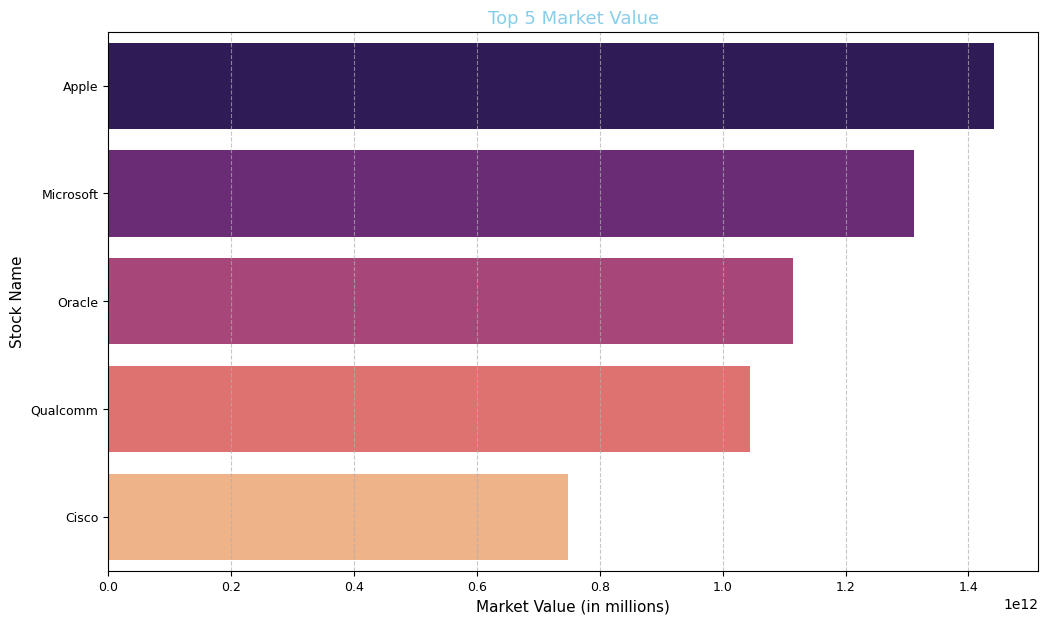

,Stock Name,Symbol,Market Value
0,Apple,AAPL,1.441327e+12
1,Microsoft,MSFT,1.311414e+12
3,Oracle,ORCL,1.113875e+12
8,Qualcomm,QCOM,1.044788e+12
7,Cisco,CSCO,7.478780e+11


In [30]:
# Pastikan kolom 'Market Value' berisi nilai string
data['Market Value'] = data['Market Value'].astype(str)

# Membersihkan data dengan menghapus tanda titik yang tidak sesuai
data['Market Value'] = data['Market Value'].str.replace('.', '', regex=False).str.replace(',', '.')

# Mengonversi kolom 'Market Value' ke tipe data float
data['Market Value'] = data['Market Value'].replace('[$,]', '', regex=True).astype(float)

# Mendapatkan 5 saham dengan Market Value tertinggi
top_5_market_value = data.nlargest(5, 'Market Value')[['Stock Name', 'Symbol', 'Market Value']]

# Menampilkan barplot untuk top 5 Market Value dengan gaya berbeda
plt.figure(figsize=(12, 7))
sns.barplot(y='Stock Name', x='Market Value', data=top_5_market_value, palette='magma')
plt.title('Top 5 Market Value', fontsize=13, color='skyblue')
plt.xlabel('Market Value (in millions)', fontsize=11)
plt.ylabel('Stock Name', fontsize=11)
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

# Menampilkan tabel untuk top 5 Market Value
top_5_market_value

<ipython-input-29-df6be56427c2>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Stock Name', x='Annual Yield', data=top_7_annual_yield, palette='cubehelix')


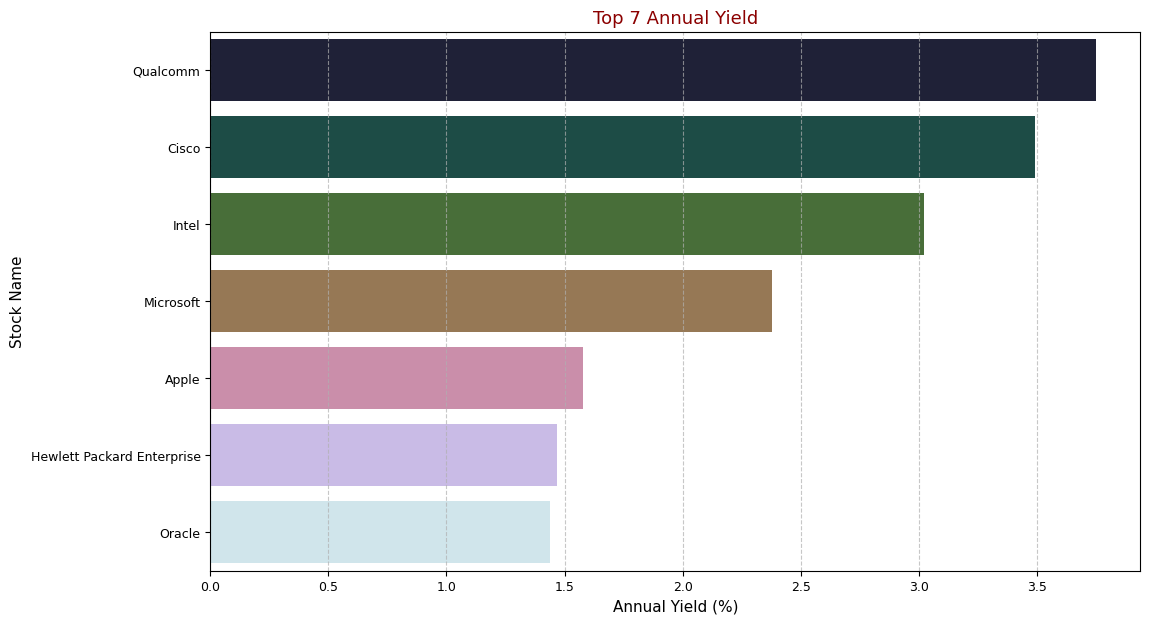

,Stock Name,Symbol,Annual Yield
8,Qualcomm,QCOM,3.75
7,Cisco,CSCO,3.49
6,Intel,INTC,3.02
1,Microsoft,MSFT,2.38
0,Apple,AAPL,1.58
4,Hewlett Packard Enterprise,HPE,1.47
3,Oracle,ORCL,1.44


In [29]:
# Menghapus simbol persen jika ada dan mengonversi kolom 'Annual Yield' ke tipe data float
data['Annual Yield'] = data['Annual Yield'].replace('[\%,]', '', regex=True).astype(float)

# Mendapatkan 7 saham dengan Annual Yield tertinggi
top_7_annual_yield = data.nlargest(7, 'Annual Yield')[['Stock Name', 'Symbol', 'Annual Yield']]

# Menampilkan barplot untuk top 7 Annual Yield dengan gaya berbeda
plt.figure(figsize=(12, 7))
sns.barplot(y='Stock Name', x='Annual Yield', data=top_7_annual_yield, palette='cubehelix')
plt.title('Top 7 Annual Yield', fontsize=13, color='darkred')
plt.xlabel('Annual Yield (%)', fontsize=11)
plt.ylabel('Stock Name', fontsize=11)
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

# Menampilkan tabel untuk top 7 Annual Yield
top_7_annual_yield